## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = [0.95,0.85,0.75,0.65,0.55,0.45]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.2f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum = %s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==========================

Epoch 20/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.5161 - acc: 0.4680 - val_loss: 1.5311 - val_acc: 0.4611
Epoch 21/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.5048 - acc: 0.4742 - val_loss: 1.5313 - val_acc: 0.4614
Epoch 22/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.4933 - acc: 0.4772 - val_loss: 1.5480 - val_acc: 0.4550
Epoch 23/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.4830 - acc: 0.4815 - val_loss: 1.5107 - val_acc: 0.4713
Epoch 24/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.4733 - acc: 0.4838 - val_loss: 1.5424 - val_acc: 0.4514
Epoch 25/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.4632 - acc: 0.4877 - val_loss: 1.5018 - val_acc: 0.4666
Experiment with momentum = 0.75
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 

Epoch 14/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.7267 - acc: 0.3989 - val_loss: 1.7254 - val_acc: 0.4011
Epoch 15/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.7154 - acc: 0.4033 - val_loss: 1.7190 - val_acc: 0.4020
Epoch 16/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.7054 - acc: 0.4056 - val_loss: 1.7054 - val_acc: 0.4058
Epoch 17/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.6949 - acc: 0.4107 - val_loss: 1.6937 - val_acc: 0.4123
Epoch 18/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.6855 - acc: 0.4150 - val_loss: 1.6873 - val_acc: 0.4114
Epoch 19/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.6764 - acc: 0.4164 - val_loss: 1.6804 - val_acc: 0.4116
Epoch 20/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.6675 - acc: 0.4198 - val_loss: 1.6695 - val_acc: 0.4200
Epoch 21/25
50000/50000 [=========

Epoch 8/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.8700 - acc: 0.3491 - val_loss: 1.8605 - val_acc: 0.3504
Epoch 9/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.8525 - acc: 0.3562 - val_loss: 1.8454 - val_acc: 0.3563
Epoch 10/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.8374 - acc: 0.3609 - val_loss: 1.8299 - val_acc: 0.3596
Epoch 11/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.8241 - acc: 0.3636 - val_loss: 1.8188 - val_acc: 0.3659
Epoch 12/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.8118 - acc: 0.3694 - val_loss: 1.8074 - val_acc: 0.3688
Epoch 13/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.8007 - acc: 0.3732 - val_loss: 1.7993 - val_acc: 0.3710
Epoch 14/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.7899 - acc: 0.3771 - val_loss: 1.7904 - val_acc: 0.3674
Epoch 15/25
50000/50000 [===========

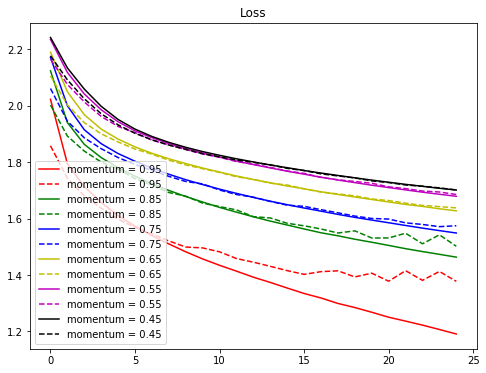

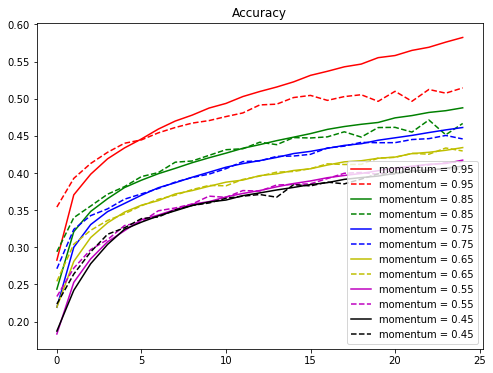

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.95
NESTEROV = [True, False]

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for nesterov in NESTEROV:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with nesterov = %s" % str(nesterov))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "nesterov = %s" % str(nesterov)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with nesterov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==========================

Epoch 20/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.3016 - acc: 0.5409 - val_loss: 1.4170 - val_acc: 0.4942
Epoch 21/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.2770 - acc: 0.5506 - val_loss: 1.3972 - val_acc: 0.5047
Epoch 22/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.2754 - acc: 0.5510 - val_loss: 1.3718 - val_acc: 0.5132
Epoch 23/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.2513 - acc: 0.5577 - val_loss: 1.3465 - val_acc: 0.5239
Epoch 24/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.2364 - acc: 0.5666 - val_loss: 1.3707 - val_acc: 0.5124
Epoch 25/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.2308 - acc: 0.5657 - val_loss: 1.3924 - val_acc: 0.5080


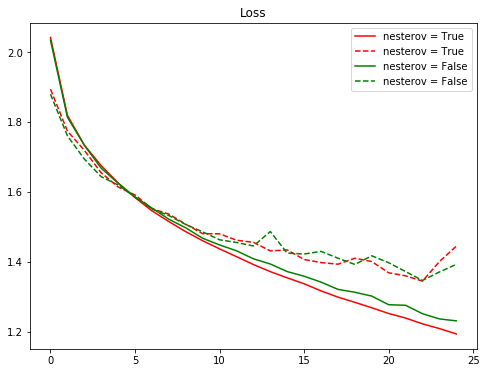

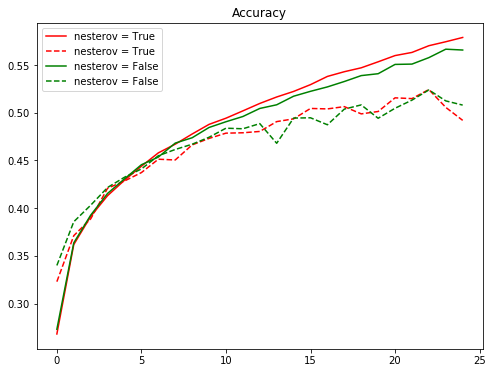

In [14]:
color_bar = ["r", "g"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()